# Exercise 1 - Solutions

In this exercise, you will solve a physics problem using appropriate *linear algebra* routines from scipy.

**Remember**
   * Solve the problem set using *appropriate* programming techniques
   * You are expected to use numpy and scipy libraries where appropriate.
   * You should run each cell in order from the top of the notebook; don't repeat code from one cell to another
   * Use the "refresh kernel" button to reset everything and start again
   * Make sure your notebook runs fully & without errors, from a fresh kernel, before submitting it

## Problem Overview

A remote overhead camera at a football stadium is suspended by three cables attached to the roof. Each cable is fed from a motorised drum so the camera can be moved around by changing the lengths of the cables. The camera has a mass of 50 kg and the attachment points are all 90 m from the centre of the pitch forming an equilateral triangle in a horizontal plane. The camera is moved in a horizontal plane at constant depth (7m) below the attachment points. You may ignore the mass of the cables.

You should use a 3D coordinate system $(x,y,z)$, in which $(0,0, 0)$ is above the centre of the pitch and the attachment points are at $p_1=(-45\sqrt{3}, -45)$, $p_2=(0, 90)$, $p_3=(45\sqrt{3}, -45)$ metres.

## Part 1

Complete the function below.  The function arguments are the $(x,y)$ position of the camera.  The function should return a 3 element numpy array, containing the tension in the cables attached to $p_1$, $p_2$, $p_3$ respectively. The function arguments and its return values should use SI units.

In [1]:
import numpy as np
from scipy import linalg
import matplotlib.pyplot as plt

p_1 = np.array([-45*np.sqrt(3), -45, 0]) #Attachment points
p_2 = np.array([0, 90, 0])
p_3 = np.array([45*np.sqrt(3), -45, 0])
z, m, g = -7, 50, -9.81         #Fixed parameters.


def tension(x, y):
    """
    Main function that solves the matrix equation we constructed. The function can either output our 3 tension values, or a None array after checking if the           output array is positive or negative. 
    """
    mag1 = np.sqrt((p_1[0] - x)**2 + (p_1[1] - y)**2 + (p_1[2] - z)**2) #Here i specify the magnitude of the vectors MP_i
    mag2 = np.sqrt((p_2[0] - x)**2 + (p_2[1] - y)**2 + (p_2[2] - z)**2)
    mag3 = np.sqrt((p_3[0] - x)**2 + (p_3[1] - y)**2 + (p_3[2] - z)**2) 

    global V                                                                                
    V = np.array([[(p_1[0] - x)/mag1, (p_2[0] - x)/mag2, (p_3[0] - x)/mag3], 
    [(p_1[1] - y)/mag1, (p_2[1] - y)/mag2, (p_3[1] - y)/mag3], 
    [(p_1[2] - z)/mag1, (p_2[2] - z)/mag2, (p_3[2] - z)/mag3 ]]) #Here V is the unit vector matrix which T is multiplied by to give the resultant forces

    R = np.array([[0], [0], [-m*g]])                             #resultant force matrix
    T = linalg.solve(V,R)                                        #scipy routine for solving for T 
    
    allgreater = all(element >= 0 for element in T)    #all(generator) for checking each element in T is larger than 0. If less than zero, situation is unphysical,                                                       #and returns an empty array.                                                        
    if allgreater == False:
        return [None, None, None]
    elif allgreater == True: 
        return T 

def MatrixMult(x,y):
    """
    Function created to check if the tension vector is correct. If tension(x,y) outputs the correct tension vector, MatrixMult outputs the resultant force vector. np.matmul does this, however
    i needed to accomadate for the case where T has None elements.
    """
    elementcheck = all(element == None for element in tension(x,y)) #all(generator) used again here to check if the Tension vector has a None element. If true,                                                                        #returns a None array, if false, returns the resultant force vector
    if elementcheck == True:
        return np.array([[None], [None], [None]])
    elif elementcheck == False:
        return np.matmul(V, tension(x,y))
    

    


## Part 2

Test your function in the next cell. To do this, call your function for a fixed point and verify the values it returns.


In [2]:
from beautifultable import BeautifulTable 
table = BeautifulTable()
table.rows.append([(p_1[0], p_1[1]), tension(p_1[0], p_1[1]), MatrixMult(p_1[0], p_1[1])])
table.rows.append([(p_2[0], p_2[1]), tension(p_2[0], p_2[1]), MatrixMult(p_2[0], p_2[1])])
table.rows.append([(p_3[0], p_3[1]), tension(p_3[0], p_3[1]), MatrixMult(p_3[0], p_3[1])])
table.rows.append([(p_2[0], p_2[1]+1), tension(p_2[0], p_2[1]+1), MatrixMult(p_2[0], p_2[1]+1)])
table.rows.append([(0, 0), tension(0, 0), MatrixMult(0, 0)])
table.rows.append([(1000, 1000), tension(1000, 1000), MatrixMult(1000, 0)])
table.columns.header = ["Coordinates (x,y)", "Tension Values (N)", "Resultant Forces (N)"]
print(table)
##above is a table that shows several different outputs for given (x,y) coordinates. 






+-----------------------------+--------------------+----------------------+
|      Coordinates (x,y)      | Tension Values (N) | Resultant Forces (N) |
+-----------------------------+--------------------+----------------------+
| (-77.94228634059948, -45.0) |      [[490.5]      |       [[  0. ]       |
|                             |       [  0. ]      |        [  0. ]       |
|                             |      [  0. ]]      |       [490.5]]       |
+-----------------------------+--------------------+----------------------+
|           (0, 90)           |      [[ -0. ]      |       [[  0. ]       |
|                             |       [490.5]      |        [  0. ]       |
|                             |      [  0. ]]      |       [490.5]]       |
+-----------------------------+--------------------+----------------------+
| (77.94228634059948, -45.0)  |      [[ -0. ]      |       [[  0. ]       |
|                             |       [  0. ]      |        [  0. ]       |
|           

## Part 3

Now use your function to plot the maximum tension in any given cable as a function of the camera position (x,y).

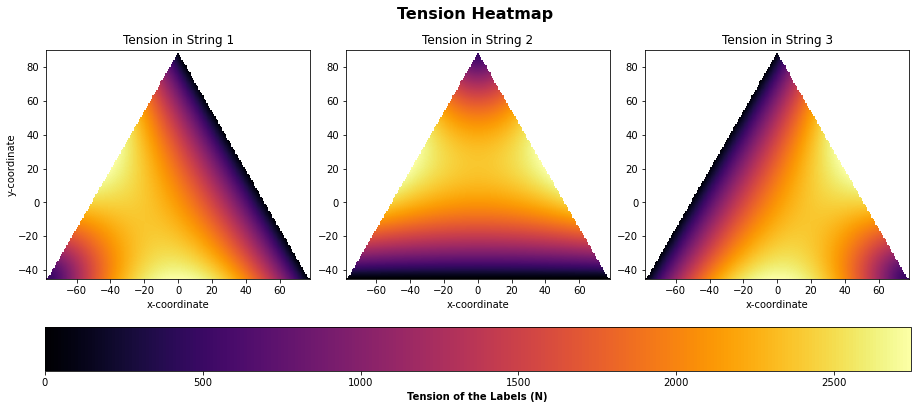

In [3]:


def plotting(min_x, max_x, min_y, max_y, numpoints):
    """
    Simple plotting function, takes the bounds of (x,y) and outputs the tension heat map for each string in the configuration.
    Numpoints denotes the number of elements in the array, which can represent the "resolution" of the heat map. For higher numpoints, the edges of the triangle map, smooth out. 
    For lower numpoints, we see rougher edges.

    """

    xvals = np.linspace(min_x, max_x, numpoints) # arrays for our values of x and y to evaluate the tension at.
    yvals = np.linspace(min_y, max_y, numpoints)

    T1vals= np.zeros((numpoints, numpoints)) #empty array to assign values to
    T2vals= np.zeros((numpoints, numpoints))
    T3vals= np.zeros((numpoints, numpoints))
    for i in range(numpoints):
        for j in range(numpoints):
            T1vals[i,j] = tension(xvals[j], (yvals[i]))[0] #for loop to index the array of x and y values to evaluate the tension at a given coordinate
            T2vals[i,j] = tension(xvals[j], (yvals[i]))[1]
            T3vals[i,j] = tension(xvals[j], (yvals[i]))[2]
    
    fig, ax = plt.subplots(1, 3, figsize=(16,6))
    fig.subplots_adjust(wspace = 0.02)
    ax[0].set_title('Tension in String 1')
    c = ax[0].imshow(T1vals, cmap = 'inferno', extent=[min_x, max_x, max_y, min_y])
    ax[0].invert_yaxis()
    ax[0].set_xlabel('x-coordinate')
    ax[0].set_ylabel('y-coordinate', labelpad = 1)
    
    ax[1].set_title('Tension in String 2')
    ax[1].imshow(T2vals, cmap = 'inferno', extent=[min_x, max_x, max_y, min_y])
    ax[1].invert_yaxis()
    ax[1].set_xlabel('x-coordinate')
    #axs[1].set_ylabel('y-coordinate', labelpad = 1)

    ax[2].set_title('Tension in String 3')
    ax[2].imshow(T3vals, cmap = 'inferno', extent=[min_x, max_x, max_y, min_y])
    ax[2].invert_yaxis()
    ax[2].set_xlabel('x-coordinate')
    #axs[2].set_ylabel('y-coordinate', labelpad =1)

    
    
    cbar = plt.colorbar(c, ax=ax, orientation = 'horizontal' , shrink = 0.97)
    #fig.colorbar(c, ax=axs, orientation='horizontal')
    fig.suptitle('Tension Heatmap', fontsize= 16, x = 0.51, fontweight = 'bold') 
    cbar.set_label('Tension of the Labels (N)', fontweight = 'bold')
    plt.show()  
    ##Used imshow, in order to use custom axes to denote the x, y coordinates on the map
    

'''
Bounds on x and y

min_x = p_1[0]
min_y = p_1[1]
max_x = p_3[0]
max_y = p_2[1]  
numpoints = 200
'''



plotting(p_1[0], p_3[0], p_1[1], p_2[1], 200) #SET NUMPOINTS TO LOWER VALUE FOR FASTER GENERATION OF PLOT. 




## Part 4

In the Markdown cell below, describe how your code solves the problem set. State any equations used in the solution and how they were obtained. Include your reasons for any libraries you used, as well as any particular programming techniques. Explain your choice of any test cases. Finally, state any salient features of the results you obtained. You are not expected to write more than about 250-300 words.

${\large \underline{\text{Constructing our Matrix Equation}}}$

The first thing that needed to be determined was the matrix equation of the system given. In this case, I decided to construct it using the unit vectors the tension vectors create when attached to the camera. To construct the matrix equation we consider two things, the unit vectors of the tension vectors, aswell as the sum of the forces for the tension vectors;
\begin{cases}
T_{1x} + T_{2x} +T_{3x} = 0 \\
T_{1y} + T_{2y} +T_{3y} = 0 \\
T_{1z} + T_{2z} +T_{3z} = mg \\
\end{cases}
The unit vectors are:  $\hat{M}_{ix} =\frac{M_{ix}}{|\vec{M_i}|}$ (similaraly defined for y and z), where $\vec{M_i} = \vec{p_i} - (x,y,z)$. Combining these two, we construct our matrix equation;
\begin{equation}
\begin{pmatrix}
    \hat{M}_{1x} & \hat{M}_{2x} & \hat{M}_{3x} \\
    \hat{M}_{1y} & \hat{M}_{2y} & \hat{M}_{3y} \\
    \hat{M}_{1z} & \hat{M}_{2z} & \hat{M}_{3z}    
\end{pmatrix} 
\begin{pmatrix}
T_1 \\
T_2 \\
T_3 
\end{pmatrix} 
= 
\begin{pmatrix} 
0 \\
0 \\ 
mg
\end{pmatrix}
\end{equation}


${\large \underline{\text{Solving Our Matrix Equation}}}$

Once we have this system of equations we can use linalg.solve function in the scipy library to easily solve for our tension vector, which is done in our tension(x,y) function. We also have to restrict the values of (x,y), as our function can simulate unphysical situation. This is fixed by checking that our tension vector is positive. If a negative vector is outputted, then we output a "None" vector. 

In part 2, I used a module called beautifultable, to easily showcase several results from our tension(x,y) function, aswell as our test function, MatrixMult(x,y).
I chose several coordinates, showing the tension vector for the positions under the cables, directly in the middle aswell as far outside the cables.

Part 3 shows the heatmaps of the array of tension values for each string, to show clearly where the tension is maximum in the system. Here I used matplotlib's imshow function, instead of pcolor to use custom axes. 